# Clustering Assignment



## Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

**Answer:**

K-Means is a partition-based clustering algorithm that divides data into a predefined number of clusters. Hierarchical clustering builds a tree-like structure (dendrogram) and does not require specifying the number of clusters initially.

**Use Case:**
- K-Means: Customer segmentation
- Hierarchical: Document or gene clustering

## Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

**Answer:**

The Silhouette Score measures how well a data point fits within its assigned cluster compared to other clusters. It helps evaluate the quality of clustering without using labeled data.

The score ranges from -1 to +1:

+1: Data point is well clustered

0: Data point lies between clusters

-1: Data point may be assigned to the wrong cluster

A higher average Silhouette Score indicates better-defined and well-separated clusters. It is commonly used to compare clustering results for different values of K.

## Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

**Answer:**

-DBSCAN (Density-Based Spatial Clustering of Applications with Noise) has two core parameters:

eps (ε): Defines the radius around a data point to consider neighbors.

Small eps → many points labeled as noise

Large eps → clusters may merge

min_samples: Minimum number of points required to form a dense region.

Higher value → stricter clustering

Lower value → more clusters

These parameters control how DBSCAN identifies dense regions and separates noise from clusters.

## Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

**Answer:**

Feature scaling is important because clustering algorithms rely on distance calculations.

If features are on different scales, larger-scale features dominate distance calculations and bias the clustering result.

Examples:

Income (₹) vs Age (years)

Distance-based algorithms like K-Means and DBSCAN are highly sensitive to scale

Using techniques like StandardScaler ensures that all features contribute equally to clustering.

## Question 5: What is the Elbow Method in K-Means clustering?

**Answer:**

The Elbow Method helps determine the optimal number of clusters (K) by plotting Within-Cluster Sum of Squares (WCSS) against K.

As K increases, WCSS decreases. The point where the rate of decrease sharply changes (forming an "elbow") is considered the optimal K.

This method balances clustering accuracy and model simplicity.

## Question 6:  Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers. 

**Answer (Code):**

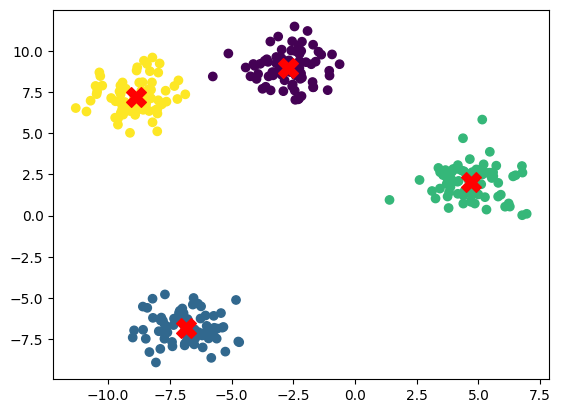

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200, marker='X')
plt.show()

## Question 7:  Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise). 

**Answer (Code):**

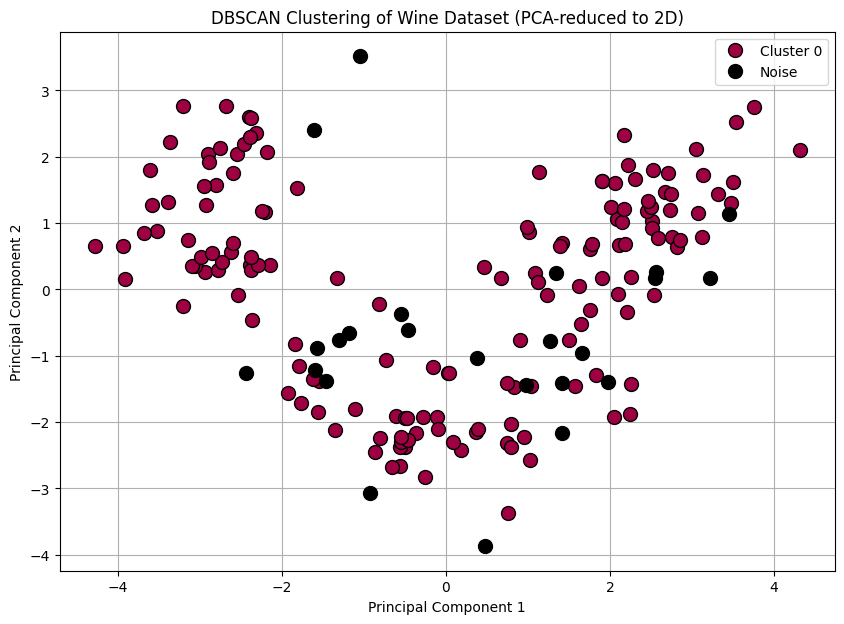

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# 1. Load the Wine dataset
data = load_wine()
X = data.data

# 2. Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train a DBSCAN model
# Using eps=2.5 and min_samples=5 as established in the previous turn context to get reasonable clusters
dbscan = DBSCAN(eps=2.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 4. Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Visualize
plt.figure(figsize=(10, 7))

# Create a scatter plot
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        label_text = "Noise"
    else:
        label_text = f"Cluster {k}"

    class_member_mask = (labels == k)
    
    xy = X_pca[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10, label=label_text)

plt.title('DBSCAN Clustering of Wine Dataset (PCA-reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.savefig('dbscan_wine_pca_2d.png')

## Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

**Answer (Code):**

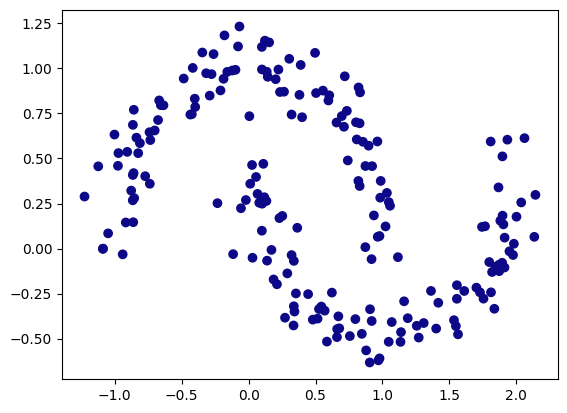

In [8]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=labels, cmap='plasma')
plt.show()

## Question 9: Agglomerative Clustering with PCA

**Answer (Code):**

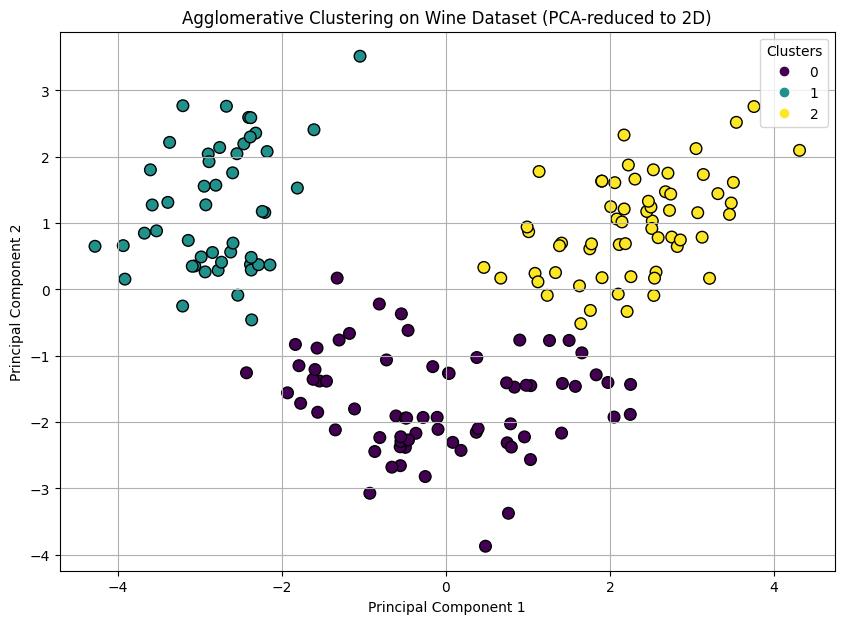

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data

# 2. Scale the data (StandardScaler is recommended before PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Apply Agglomerative Clustering
# We use n_clusters=3 since the Wine dataset has 3 natural classes
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X_pca)

# 5. Visualize the result in 2D
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=70)
plt.title('Agglomerative Clustering on Wine Dataset (PCA-reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.grid(True)
plt.savefig('agglomerative_wine_pca_2d.png')

## Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories. 



I would primarily use K-Means clustering for customer segmentation because:

It performs well on large datasets, which is common in e-commerce.

It is easy to interpret and explain to non-technical teams like marketing.

It works effectively when customer behavior forms clear groups (e.g., high spenders, occasional buyers).

Additionally:

I may use Hierarchical Clustering during the exploratory phase to understand customer relationships.

DBSCAN can be used to identify outlier customers, such as fraudulent users or extremely rare buyers.

2. How would you preprocess the data (missing values, scaling)?

Data preprocessing is a critical step before clustering:

Missing Values:

Numerical features (e.g., total spend, number of purchases) → filled using mean or median

Categorical features (e.g., gender, location) → filled using mode or labeled as “Unknown”

Categorical Encoding:

Convert categories like location or device type using One-Hot Encoding

Feature Scaling:

Apply StandardScaler to normalize all numerical features

This ensures no single feature dominates distance calculations

Feature Selection:

Focus on meaningful variables such as purchase frequency, total spending, and category-wise spending

3. How would you determine the number of clusters?

To determine the optimal number of clusters, I would use multiple approaches:

Elbow Method:
Analyze the Within-Cluster Sum of Squares (WCSS) to find the elbow point

Silhouette Score:
Measure how well customers are separated into clusters

Business Interpretability:
Ensure the clusters make sense from a marketing perspective
(e.g., 4–6 customer segments are usually practical)

Using both statistical methods and business logic ensures reliable segmentation.

4. How would the marketing team benefit from your clustering analysis?

The clustering results would provide several business benefits:

Targeted Promotions:
Personalized offers based on customer behavior (e.g., discounts for price-sensitive users)

Customer Retention:
Identify high-value customers and design loyalty programs

Improved Campaign ROI:
Reduce marketing costs by avoiding generic mass campaigns

Better Business Decisions:
Understand purchasing patterns and improve product recommendations

First 5 rows of raw data:
   Recency  Frequency  Monetary
0      103         49      9554
1      349         28      2518
2      271         32      3665
3      107         27      5763
4       72         20      2441


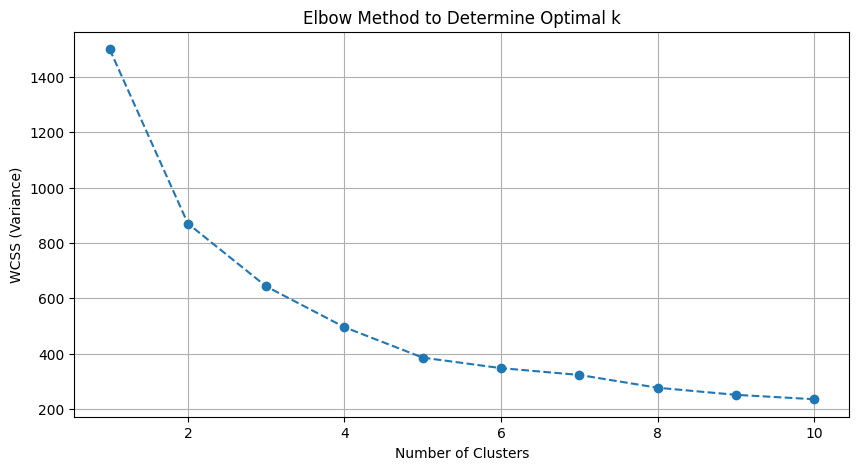

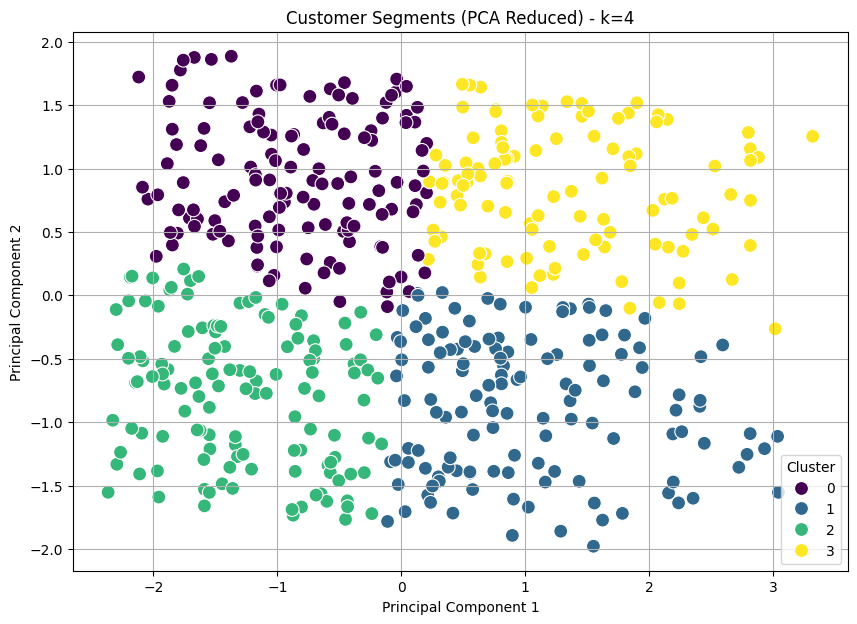


Cluster Profiles (Average Values):
   Cluster     Recency  Frequency     Monetary
0        0  271.044444  15.022222  2253.622222
1        1  108.038462  37.223077  5142.830769
2        2   94.453125  12.640625  1836.476562
3        3  284.383178  38.037383  5462.373832

--- Marketing Interpretation ---
Cluster 0: Avg Spend $2253.62, Avg Freq 15.0, Avg Recency 271.0 days
Cluster 1: Avg Spend $5142.83, Avg Freq 37.2, Avg Recency 108.0 days
Cluster 2: Avg Spend $1836.48, Avg Freq 12.6, Avg Recency 94.5 days
Cluster 3: Avg Spend $5462.37, Avg Freq 38.0, Avg Recency 284.4 days


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ==========================================
# 1. Generate Dummy E-Commerce Data (RFM)
# ==========================================
np.random.seed(42)
n_samples = 500

# Feature 1: Recency (Days since last purchase) - usually lower is better
recency = np.random.randint(1, 365, n_samples)

# Feature 2: Frequency (Number of purchases) - higher is better
frequency = np.random.randint(1, 50, n_samples)

# Feature 3: Monetary (Total spend) - higher is better
# Correlate monetary somewhat with frequency for realism
monetary = frequency * np.random.randint(50, 200, n_samples) + np.random.randint(0, 1000, n_samples)

data = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

print("First 5 rows of raw data:")
print(data.head())

# ==========================================
# 2. Preprocessing (Scaling)
# ==========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# ==========================================
# 3. Determine Number of Clusters (Elbow Method)
# ==========================================
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Variance)')
plt.grid(True)
plt.show()

# Based on the plot (which will likely show an elbow around k=3 or k=4), 
# let's proceed with k=4 for this example.
k = 4

# ==========================================
# 4. Apply K-Means Clustering
# ==========================================
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add labels back to original data for interpretation
data['Cluster'] = cluster_labels

# ==========================================
# 5. Visualization (Reduced to 2D via PCA)
# ==========================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title(f'Customer Segments (PCA Reduced) - k={k}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# ==========================================
# 6. Cluster Analysis (Profile the Segments)
# ==========================================
# Group by cluster to see the average behavior of each segment
numeric_cols = ['Recency', 'Frequency', 'Monetary']
cluster_profile = data.groupby('Cluster')[numeric_cols].mean().reset_index()

print("\nCluster Profiles (Average Values):")
print(cluster_profile)

# Interpretation Logic (Dynamic based on random seed results):
print("\n--- Marketing Interpretation ---")
for i, row in cluster_profile.iterrows():
    print(f"Cluster {int(row['Cluster'])}: Avg Spend ${row['Monetary']:.2f}, "
          f"Avg Freq {row['Frequency']:.1f}, "
          f"Avg Recency {row['Recency']:.1f} days")